#clustering analysis

#1. Data Preprocessing

In [67]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Load dataset

In [53]:
df = pd.read_excel('EastWestAirlines.xlsx')


 Load datasetprint("Before preprocessing:")


In [54]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB
None
East-West Airlines is trying to learn more about

STEP 1: Separate columns by data type

In [55]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

STEP 2: Impute Missing Values

Numeric columns: use mean


In [56]:
if len(numeric_cols) > 0:
    num_imputer = SimpleImputer(strategy='mean')
    df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

Categorical columns: use most frequent


In [57]:
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


STEP 3: Optional - Remove Outliers using IQR

In [58]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

 STEP 4: Encode Categorical Columns (Optional but needed for clustering)


In [59]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


 STEP 5: Scale the Features


In [60]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Convert scaled array back to DataFrame

In [61]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [62]:

print("After preprocessing:")
print(df_scaled.shape)
df_scaled.head()

After preprocessing:
(26, 40)


,East-West Airlines is trying to learn more about its customers. Key issues are their_(c) 2016 Galit Shmueli and Peter Bruce,East-West Airlines is trying to learn more about its customers. Key issues are their_Award?,East-West Airlines is trying to learn more about its customers. Key issues are their_Balance,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_miles,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_trans,East-West Airlines is trying to learn more about its customers. Key issues are their_Days_since_enroll,East-West Airlines is trying to learn more about its customers. Key issues are their_Field Name,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_miles_12mo,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_trans_12,East-West Airlines is trying to learn more about its customers. Key issues are their_ID#,...,Unnamed: 4_Number of flight miles in the past 12 months,Unnamed: 4_Number of flight transactions in the past 12 months,Unnamed: 4_Number of miles counted as qualifying for Topflight status,Unnamed: 4_Number of miles earned from non-flight bonus transactions in the past 12 months,Unnamed: 4_Number of miles earned with Rewards credit card in the past 12 months:,Unnamed: 4_Number of miles earned with Small Business credit card in the past 12 months:,Unnamed: 4_Number of miles earned with freq. flyer credit card in the past 12 months:,Unnamed: 4_Number of miles eligible for award travel,Unnamed: 4_Number of non-flight bonus transactions in the past 12 months,Unnamed: 4_Unique ID
0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
3,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
4,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2


#Exploratory Data Analysis (EDA)

In [69]:
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

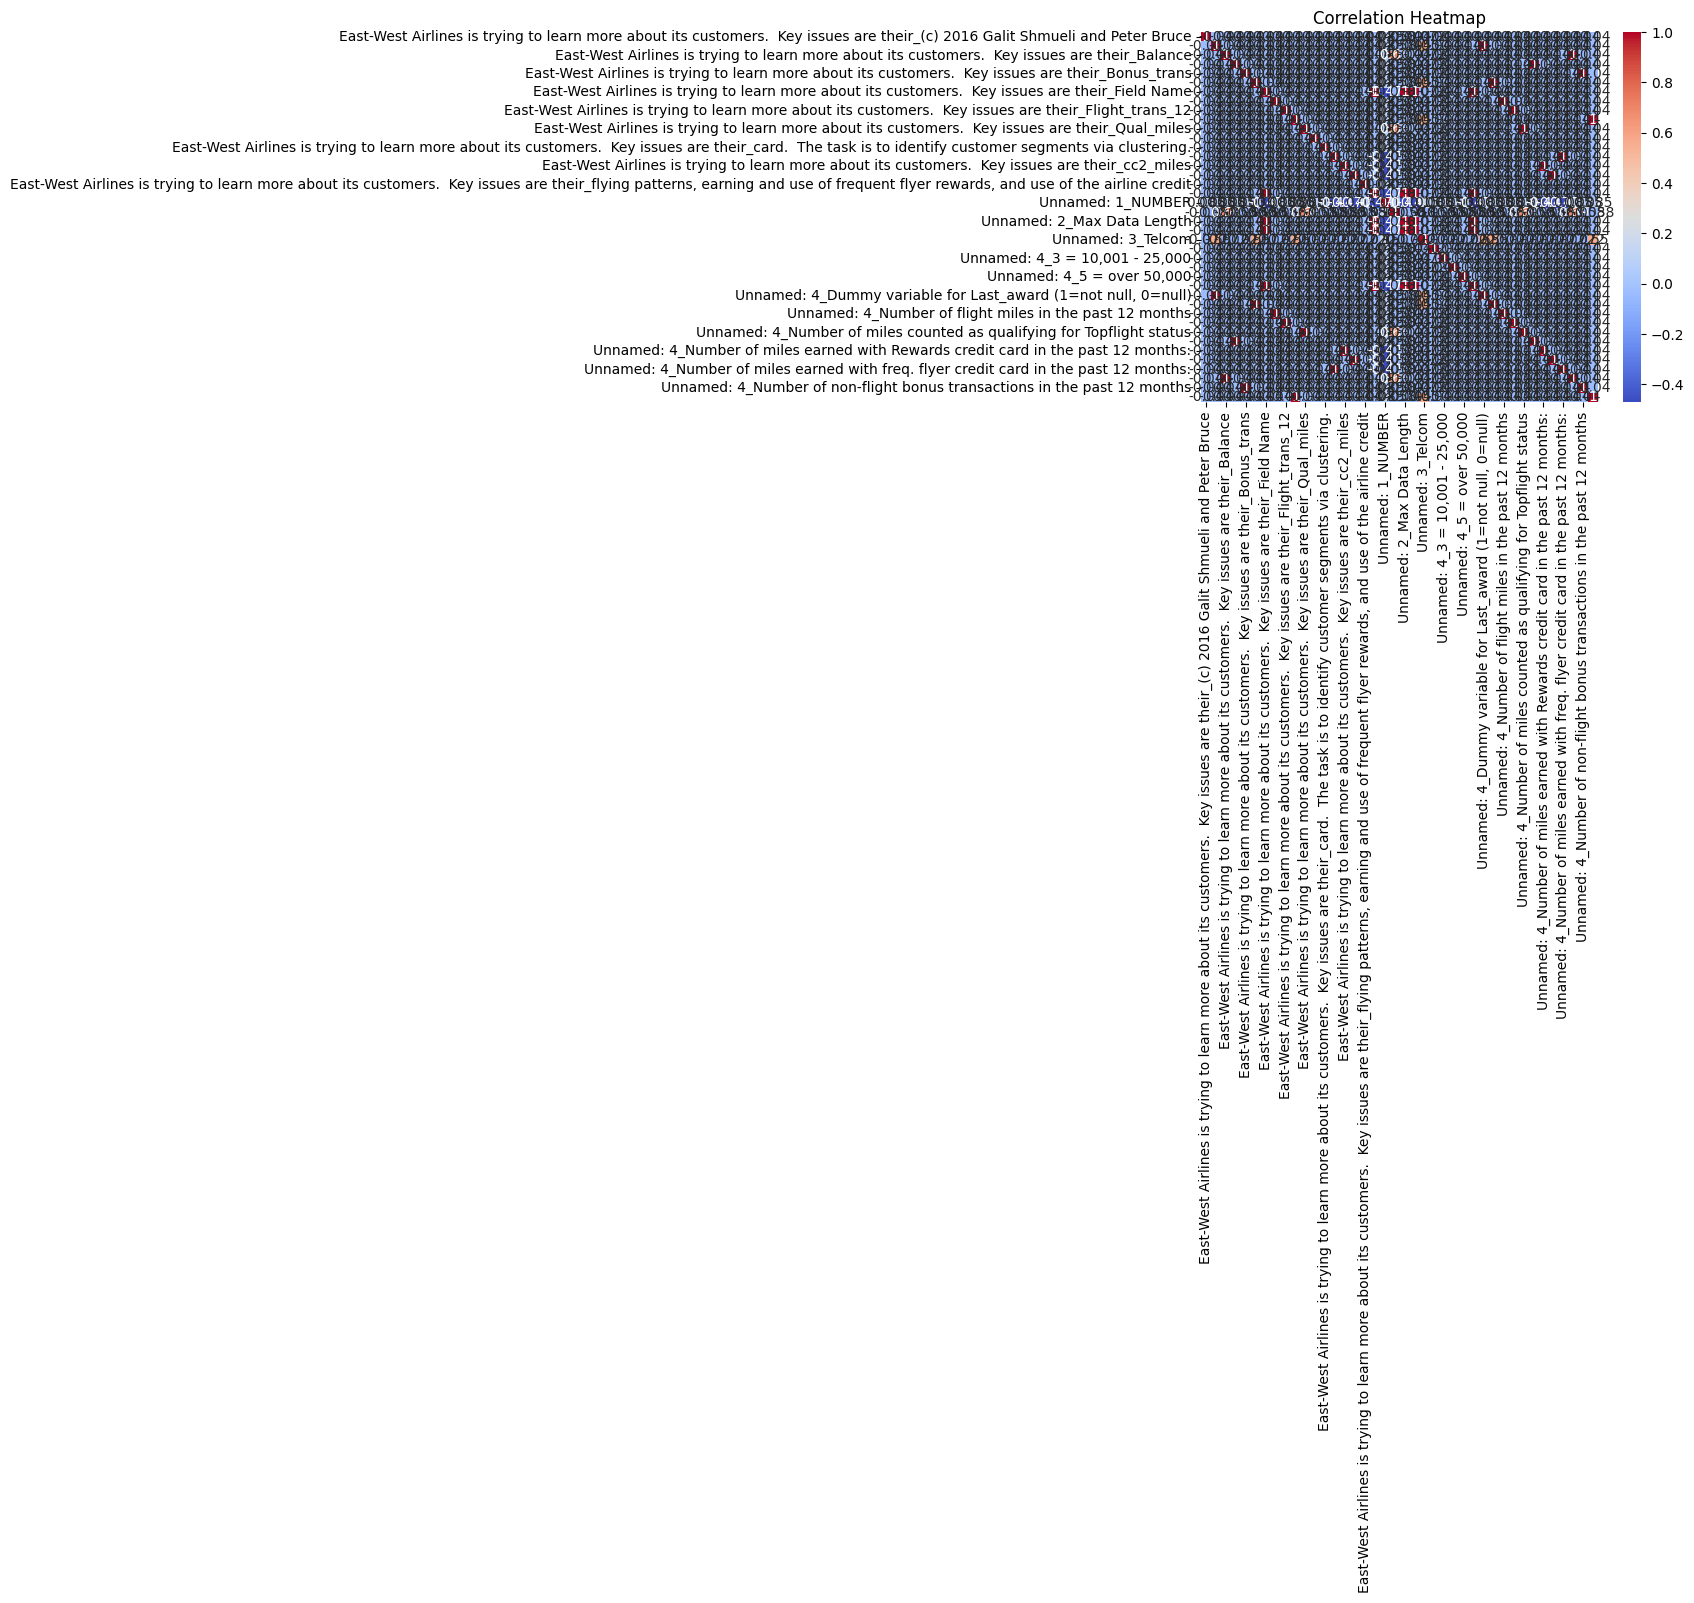

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(df_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#K-Means Clustering


In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

 Elbow Method to find optimal K


In [75]:
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Change scaled_data to df_scaled to use the correctly named variable
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

Plot Elbow Curve

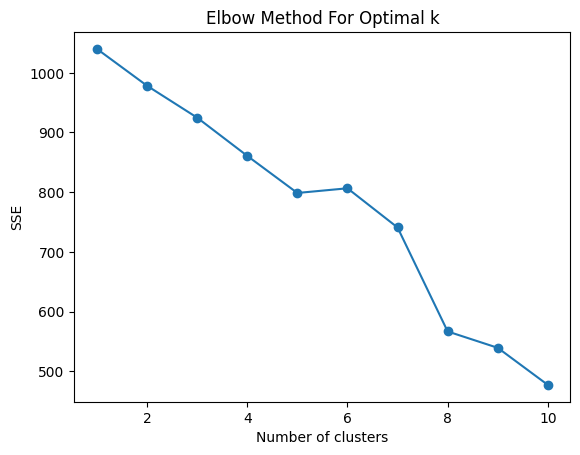

In [76]:
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

 Fit optimal K


In [78]:
optimal_k = 3  # Replace after checking elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# Changed 'scaled_data' to 'df_scaled' to use the correct variable
kmeans_labels = kmeans.fit_predict(df_scaled)

 Silhouette Score


In [80]:
sil_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score (K-Means): {sil_kmeans}')

Silhouette Score (K-Means): 0.12200663952327839


#4. Hierarchical Clustering

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


Create dendrogram


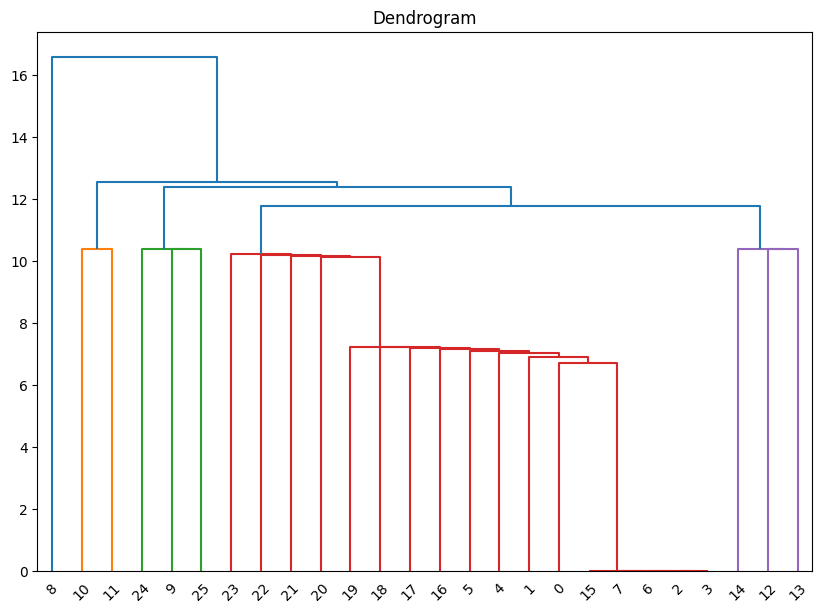

In [83]:
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

Choose number of clusters


In [84]:
hier_labels = fcluster(linked, t=3, criterion='maxclust')


Silhouette Score


In [86]:
# Changed 'scaled_data' to 'df_scaled' to use the correct variable
sil_hier = silhouette_score(df_scaled, hier_labels)
print(f'Silhouette Score (Hierarchical): {sil_hier}')

Silhouette Score (Hierarchical): 0.18767511909632148


#5. DBSCAN

In [87]:
from sklearn.cluster import DBSCAN


 Fit DBSCAN


In [89]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
# Change 'scaled_data' to 'df_scaled' to use the correct variable
dbscan_labels = dbscan.fit_predict(df_scaled)

Filter out noise (-1 labels)


In [91]:
# Change 'scaled_data' to 'df_scaled' to use the correct variable
filtered_data = df_scaled[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

Silhouette Score


In [92]:
if len(set(filtered_labels)) > 1:
    sil_dbscan = silhouette_score(filtered_data, filtered_labels)
    print(f'Silhouette Score (DBSCAN): {sil_dbscan}')
else:
    print("DBSCAN formed less than 2 clusters. Cannot compute silhouette score.")


DBSCAN formed less than 2 clusters. Cannot compute silhouette score.


#6. Cluster Visualization

Visualize Clusters using PCA or any 2 features


In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled) # Changed scaled_data to df_scaled

Plot for KMeans


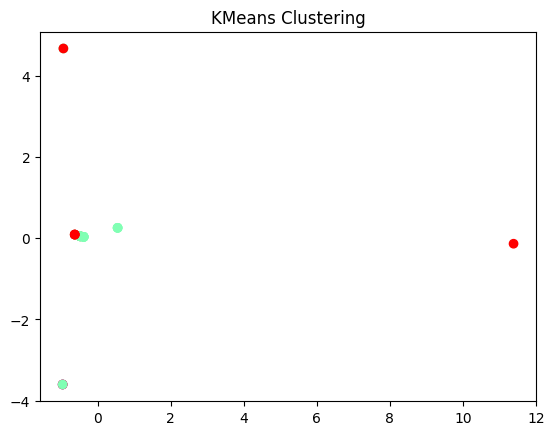

In [96]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title("KMeans Clustering")
plt.show()

Plot for Hierarchical


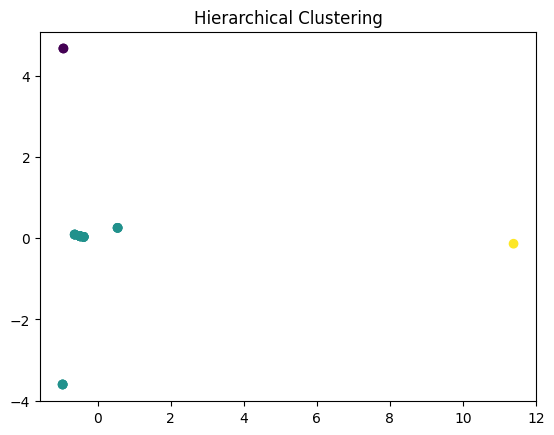

In [97]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hier_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()

Plot for DBSCAN

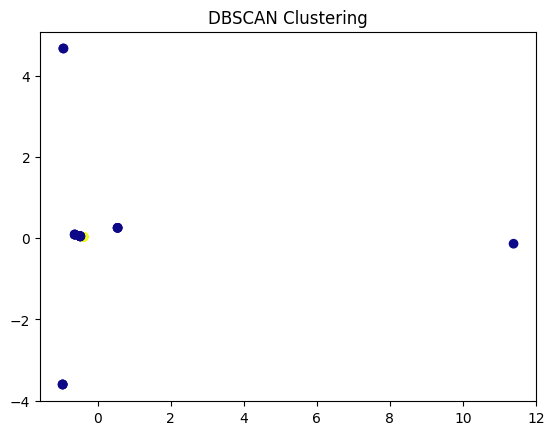

In [98]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


#7. Cluster Interpretation

In [100]:
# - K-Means formed ___ clusters, with characteristics such as _________.
# - Hierarchical clustering grouped the data based on _______, forming ___ clusters.
# - DBSCAN successfully identified core and noise points, capturing _______ patterns.

